# Analisis Data Cuaca BMKG Indonesia Tahun 2000–2025

### Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os
import glob
import openpyxl
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor



import warnings
warnings.filterwarnings('ignore')

## 1.Data wrangling

### Data Gathering

In [2]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
# import data
df_bmkg1 = pd.read_csv('../content/laporan_iklim_harian-250609220217.csv',sep=';',decimal=',')
df_bmkg2 = pd.read_csv('../content/laporan_iklim_harian-250609220319.csv',sep=';',decimal=',')


#### Melihat Contoh data

In [8]:
# cek data
df_bmkg1.head(1)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2000,24,"29,4","26,8",83,"9,1",2,4,280,2,W


##  2. Data Assessing

### 2.1 Cek struktur kolom

In [ ]:
# melihat sturuktur data untuk df_bmkg1
df_bmkg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301 entries, 0 to 9300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  9301 non-null   object
 1   TN       9301 non-null   object
 2   TX       9301 non-null   object
 3   TAVG     9301 non-null   object
 4   RH_AVG   9301 non-null   object
 5   RR       9301 non-null   object
 6   SS       9301 non-null   object
 7   FF_X     9301 non-null   object
 8   DDD_X    9301 non-null   object
 9   FF_AVG   9301 non-null   object
 10  DDD_CAR  9301 non-null   object
dtypes: object(11)
memory usage: 799.4+ KB


In [ ]:
# melihat struktur data untuk df_bmkg2
df_bmkg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9232 entries, 0 to 9231
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  9232 non-null   object
 1   TN       9232 non-null   object
 2   TX       9232 non-null   object
 3   TAVG     9232 non-null   object
 4   RH_AVG   9232 non-null   object
 5   RR       9232 non-null   object
 6   SS       9232 non-null   object
 7   FF_X     9232 non-null   object
 8   DDD_X    9232 non-null   object
 9   FF_AVG   9232 non-null   object
 10  DDD_CAR  9232 non-null   object
dtypes: object(11)
memory usage: 793.5+ KB


### 2.2 Cek distribusi data

#### 2.2.1 Distribusi Untuk Data df_bmkg1

In [ ]:
# melihat data untuk kolom DDD_CAR
df_bmkg1['DDD_CAR'].value_counts()

DDD_CAR
N     2398
C     1863
W     1712
E     1406
NW     616
NE     511
C      296
SW     202
S      176
SE      94
W       22
-        3
E        2
Name: count, dtype: int64

#### 2.2.1 Distribusi Untuk Data df_bmkg2

In [ ]:
# meelihat nilai unik untuk kolom DDD_CAR
df_bmkg2['DDD_CAR'].value_counts()

DDD_CAR
N     1964
W     1587
NE    1319
E      949
C      822
NW     762
SE     660
SW     549
S      239
C      181
-       92
W       80
E       23
S        5
Name: count, dtype: int64

#### 2.2.1 Distribusi Untuk Data df_WIII

### 2.3 Statistik deskriptif

In [ ]:
# statsistik deskriptif untuk df_bmkg1
df_bmkg1.describe()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
count,9301,9301,9301,9301,9301,9301,9301,9301,9301,9301,9301
unique,9283,34,102,76,47,616,105,18,58,8,13
top,01-12-2021,25,33,"28,6",76,0,8,4,270,1,N
freq,2,3079,579,437,733,4839,1048,3639,1004,3640,2398


In [ ]:
# statsistik deskriptif untuk df_bmkg2
df_bmkg2.describe()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
count,9232,9232,9232,9232,9232,9232,9232,9232,9232,9232,9232
unique,9213,69,116,78,56,626,114,26,48,15,14
top,03-10-2020,26,33,"28,9",76,0,8,5,360,2,N
freq,2,2755,470,395,678,4604,721,2104,999,3454,1964


### 2.5 Null & NaN Summary

In [9]:
# ,eihat jumlah nilai yang hilang (NaN) di setiap kolom
df_bmkg1.isnull().sum()

,0
TANGGAL,0
TN,0
TX,0
TAVG,0
RH_AVG,0
RR,0
SS,0
FF_X,0
DDD_X,0
FF_AVG,0


In [10]:
# melihat jumlah nilai yang hilang (NaN) di setiap kolom
df_bmkg2.isnull().sum()

,0
TANGGAL,0
TN,0
TX,0
TAVG,0
RH_AVG,0
RR,0
SS,0
FF_X,0
DDD_X,0
FF_AVG,0


### 2.7 Duplicated row check

In [ ]:
df_bmkg1.duplicated().sum()

np.int64(18)

In [ ]:
df_bmkg2.duplicated().sum()

np.int64(19)

### 2.8 Corrupt/invalid rows

In [11]:
# Jumlah data tidak valid (bukan angka) per kolom numerik
kolom_numerik = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']  # sesuaikan dengan kolom dataset Anda

for kolom in kolom_numerik:
    if kolom in df_bmkg1.columns:
        # Hitung jumlah data yang tidak bisa dikonversi ke angka (dan bukan NaN)
        mask = pd.to_numeric(df_bmkg1[kolom], errors='coerce').isna() & df_bmkg1[kolom].notna()
        jumlah_rusak = mask.sum()
        print(f"Jumlah data tidak valid di kolom '{kolom}': {jumlah_rusak}")

Jumlah data tidak valid di kolom 'TN': 1431
Jumlah data tidak valid di kolom 'TX': 7247
Jumlah data tidak valid di kolom 'TAVG': 8415
Jumlah data tidak valid di kolom 'RH_AVG': 17
Jumlah data tidak valid di kolom 'RR': 3251
Jumlah data tidak valid di kolom 'SS': 4999
Jumlah data tidak valid di kolom 'FF_X': 1
Jumlah data tidak valid di kolom 'DDD_X': 2
Jumlah data tidak valid di kolom 'FF_AVG': 2


In [ ]:
# Jumlah data tidak valid (bukan angka) per kolom numerik
kolom_numerik = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']  # sesuaikan dengan kolom dataset Anda

for kolom in kolom_numerik:
    if kolom in df_bmkg2.columns:
        # Hitung jumlah data yang tidak bisa dikonversi ke angka (dan bukan NaN)
        mask = pd.to_numeric(df_bmkg2[kolom], errors='coerce').isna() & df_bmkg2[kolom].notna()
        jumlah_rusak = mask.sum()
        print(f"Jumlah data tidak valid di kolom '{kolom}': {jumlah_rusak}")

Jumlah data tidak valid di kolom 'TN': 1973
Jumlah data tidak valid di kolom 'TX': 7690
Jumlah data tidak valid di kolom 'TAVG': 8279
Jumlah data tidak valid di kolom 'RH_AVG': 112
Jumlah data tidak valid di kolom 'RR': 3729
Jumlah data tidak valid di kolom 'SS': 7061
Jumlah data tidak valid di kolom 'FF_X': 15
Jumlah data tidak valid di kolom 'DDD_X': 12
Jumlah data tidak valid di kolom 'FF_AVG': 9


### 2.9 Visualisasi awal distribusi

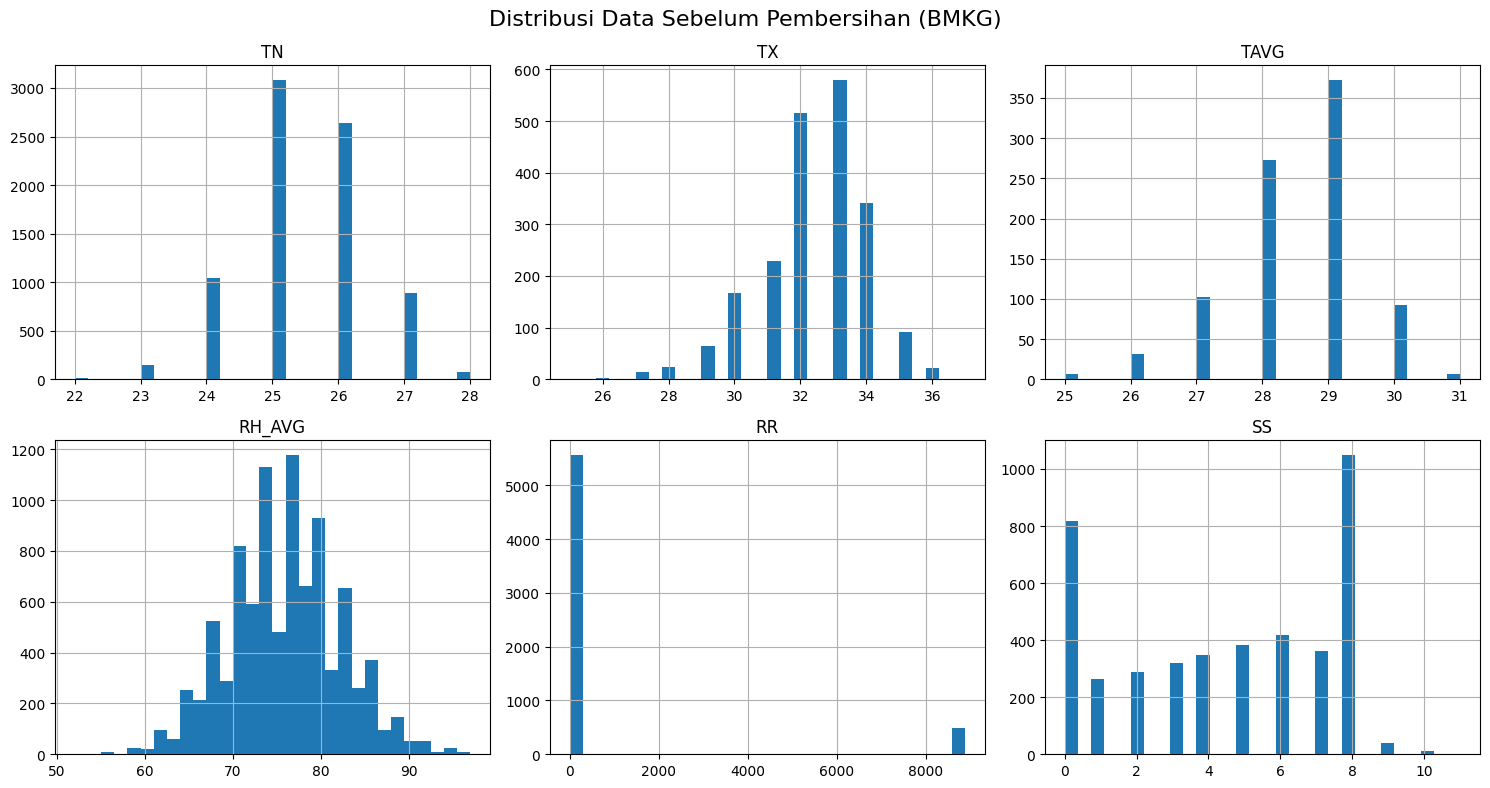

In [12]:
kolom_numerik_bmkg = [
    'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG'
]

# Pilih kolom yang ada di df_bmkg1
sample_cols_bmkg = [col for col in kolom_numerik_bmkg if col in df_bmkg1.columns][:6]

# Konversi ke float (jika belum)
df_bmkg1_plot = df_bmkg1[sample_cols_bmkg].apply(pd.to_numeric, errors='coerce')

df_bmkg1_plot.hist(bins=30, figsize=(15, 8), layout=(2, 3))
plt.suptitle('Distribusi Data Sebelum Pembersihan (BMKG)', fontsize=16)
plt.tight_layout()
plt.show()

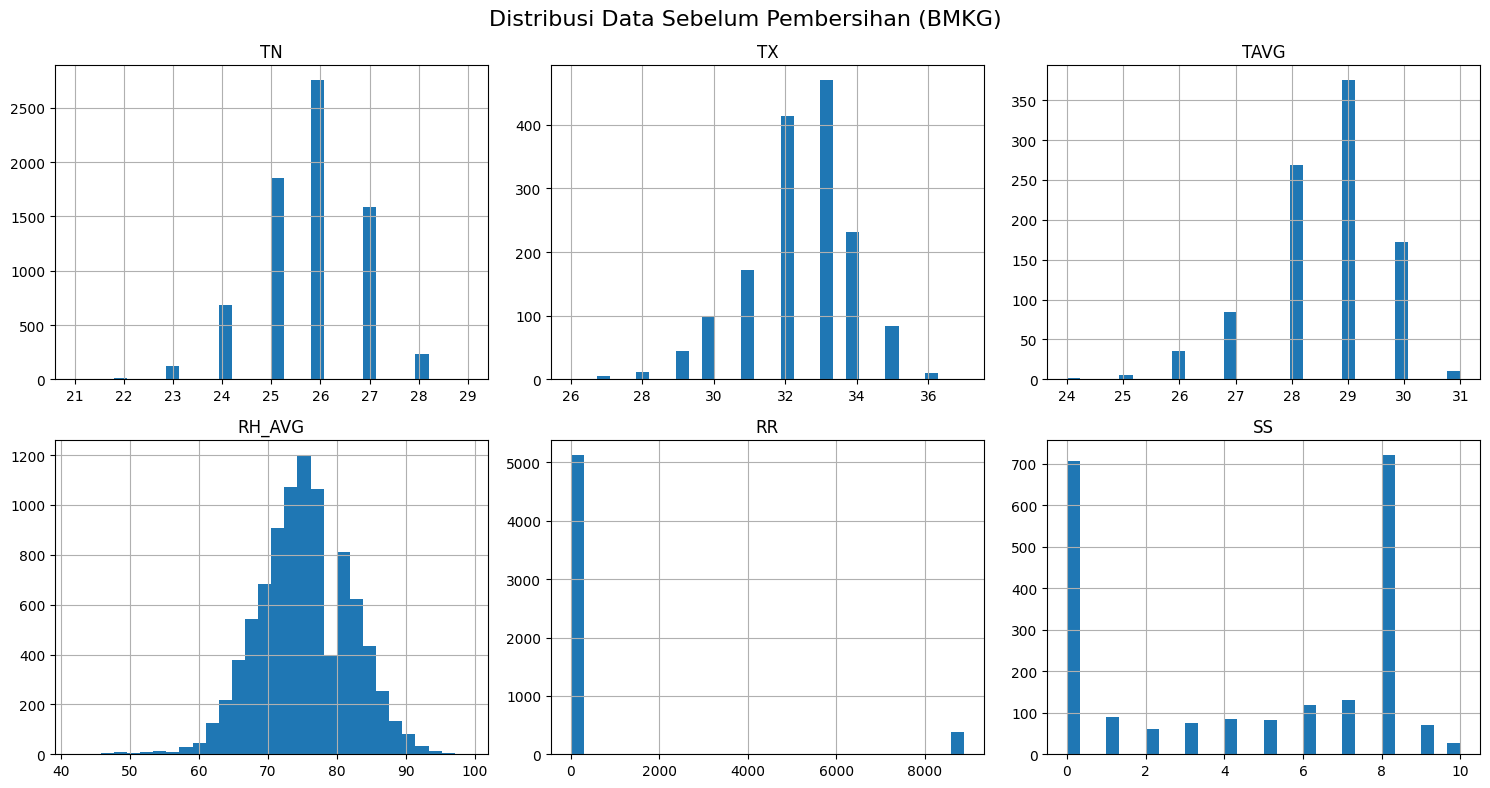

In [ ]:
kolom_numerik_bmkg = [
    'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG'
]

# Pilih kolom yang ada di df_bmkg2
sample_cols_bmkg = [col for col in kolom_numerik_bmkg if col in df_bmkg2.columns][:6]

# Konversi ke float (jika belum)
df_bmkg2_plot = df_bmkg2[sample_cols_bmkg].apply(pd.to_numeric, errors='coerce')

df_bmkg2_plot.hist(bins=30, figsize=(15, 8), layout=(2, 3))
plt.suptitle('Distribusi Data Sebelum Pembersihan (BMKG)', fontsize=16)
plt.tight_layout()
plt.show()

### 2.10 Dokumentasi masalah

#### 📋 DOKUMENTASI TEMUAN DATA QUALITY ASSESSMENT

#### 🗂️ 1. OVERVIEW DATASET
- **df_bmkg1**: 9,301 baris × 11 kolom (data BMKG periode 1)
- **df_bmkg2**: 9,232 baris × 11 kolom (data BMKG periode 2)  
- **df_WIII**: 374,329 baris × 33 kolom (data cuaca internasional)

#### 🔍 2. MASALAH STRUKTUR DATA

###### 2.1 Tipe Data Tidak Sesuai
**BMKG 1 & 2:**
- ❌ Semua kolom bertipe object padahal seharusnya numerik
- Kolom yang perlu dikonversi: `TN`, `TX`, `TAVG`, `RH_AVG`, `RR`, `SS`, `FF_X`, `DDD_X`, `FF_AVG`
- `TANGGAL` perlu dikonversi ke datetime

**WIII:**
- ❌ 30 dari 33 kolom bertipe object padahal seharusnya numerik
- Hanya `lon`, `lat`, `elevation` yang sudah bertipe float64
- Kolom numerik yang perlu dikonversi: 25+ kolom cuaca

###### 2.2 Decimal Separator Issue
- BMKG menggunakan koma (`,`) sebagai decimal separator
- Contoh: `28,6` instead of `28.6`

#### 📊 3. MISSING VALUES & INVALID DATA

###### 3.1 Missing Values (Simbol 'M')
**WIII Dataset:**
- ⚠️ 374,329 baris mengandung nilai 'M' (100% data terpengaruh)
- Kolom paling bermasalah:
    - `ice_accretion_*`, `peak_wind_*`, `snowdepth`: 100% missing
    - `mslp`: 91.9% missing (344,063/374,329)
    - `gust`: 99.0% missing (370,528/374,329)

###### 3.2 Data Tidak Valid (Non-Numeric)
**BMKG 1:**
- `TAVG`: 8,415 nilai invalid
- `TX`: 7,247 nilai invalid
- `SS`: 4,999 nilai invalid
- `RR`: 3,251 nilai invalid

**BMKG 2:**
- `TAVG`: 8,279 nilai invalid
- `TX`: 7,690 nilai invalid
- `SS`: 7,061 nilai invalid
- `RR`: 3,729 nilai invalid

**WIII:**
- Hampir semua kolom memiliki data invalid dalam jumlah besar
- `mslp`: 344,063 invalid values
- `p01i`: 125,200 invalid values

#### 🔄 4. DATA DUPLICATES
- **df_bmkg1**: 18 baris duplikat
- **df_bmkg2**: 19 baris duplikat
- **df_WIII**: 32 baris duplikat

#### 📈 5. DISTRIBUSI DATA

###### 5.1 Distribusi Kategorik (DDD_CAR)
**BMKG 1 - Arah Angin:**
- Dominan: N (2,398), C (1,863), W (1,712)
- Ada duplikasi nilai: C, W, E, S muncul 2x

**BMKG 2 - Arah Angin:**
- Dominan: N (1,964), W (1,587), NE (1,319)
- Pola distribusi berbeda dari BMKG 1

###### 5.2 Distribusi Numerik
**WIII (lon, lat, elevation):**
- Data sangat homogen (std ≈ 0)
- Semua data dari satu lokasi: lon=106.66°, lat=-6.13°, elevation=8m
- Menunjukkan data dari satu stasiun cuaca saja

#### ⚠️ 6. MASALAH KRITIS YANG DITEMUKAN
- ❌ **Tipe Data Salah**: Hampir semua kolom numerik dibaca sebagai string
- ❌ **Format Decimal**: Koma vs titik decimal separator
- ❌ **Missing Values Masif**: 99% data WIII mengandung 'M'
- ❌ **Data Invalid Tinggi**: Ribuan nilai non-numeric pada kolom numerik
- ❌ **Kolom Tidak Berguna**: Beberapa kolom WIII 100% missing
- ❌ **Data Lokasi Homogen**: WIII hanya dari 1 stasiun

#### 🔧 7. REKOMENDASI DATA CLEANING

###### Priority 1 - Critical:
1. Konversi semua kolom numerik ke tipe float
2. Replace ',' dengan '.' untuk decimal
3. Convert 'M' menjadi NaN
4. Remove/handle kolom dengan >90% missing values

###### Priority 2 - Important:
1. Handle duplicate records
2. Standardisasi format tanggal
3. Validasi range nilai (outlier detection)
4. Merge datasets jika memungkinkan

###### Priority 3 - Optional:
1. Feature engineering untuk kolom arah angin
2. Interpolasi missing values untuk time series
3. Data enrichment dengan lokasi geografis

---
**📅 Assessment Date**: June 11, 2025  
**🔍 Total Issues Found**: 25+ critical data quality issues  
**⚡ Estimated Cleaning Effort**: High (Major restructuring needed)

## Data Cleaning

### 2.1 Memperbaiki stuktur data

In [13]:
# 1. Membuat copy data untuk cleaning
df_bmkg1_clean = df_bmkg1.copy()
df_bmkg2_clean = df_bmkg2.copy()

In [14]:
# 2. Merubah tipe data Tanggal menjadi datetime
df_bmkg1_clean['TANGGAL'] = pd.to_datetime(df_bmkg1_clean['TANGGAL'], format='%d-%m-%Y', errors='coerce')
df_bmkg2_clean['TANGGAL'] = pd.to_datetime(df_bmkg2_clean['TANGGAL'], format='%d-%m-%Y', errors='coerce')

In [15]:
# 3. Merubah tipe data object menjadi numerik kecuali kolom TANGGAL dan DDD_CAR
# Dengan menangani decimal separator koma terlebih dahulu
for col in df_bmkg1_clean.columns:
    if col not in ['TANGGAL', 'DDD_CAR']:
        # Ganti koma dengan titik untuk decimal separator
        df_bmkg1_clean[col] = df_bmkg1_clean[col].astype(str).str.replace(',', '.')
        # Konversi ke numerik
        df_bmkg1_clean[col] = pd.to_numeric(df_bmkg1_clean[col], errors='coerce')

for col in df_bmkg2_clean.columns:
    if col not in ['TANGGAL', 'DDD_CAR']:
        # Ganti koma dengan titik untuk decimal separator
        df_bmkg2_clean[col] = df_bmkg2_clean[col].astype(str).str.replace(',', '.')
        # Konversi ke numerik
        df_bmkg2_clean[col] = pd.to_numeric(df_bmkg2_clean[col], errors='coerce')

In [16]:
# 4. Menangani nilai tidak valid seperti 8888.0 dan 9999.0
nilai_tidak_valid = [8888.0, 9999.0]
for col in df_bmkg1_clean.columns:
    if col not in ['TANGGAL', 'DDD_CAR']:
        df_bmkg1_clean[col] = df_bmkg1_clean[col].replace(nilai_tidak_valid, np.nan)
for col in df_bmkg2_clean.columns:
    if col not in ['TANGGAL', 'DDD_CAR']:
        df_bmkg2_clean[col] = df_bmkg2_clean[col].replace(nilai_tidak_valid, np.nan)


In [17]:
# 5. Mengisi nilai NaN dengan metode IterativeImputer

# Pilih kolom numerik untuk imputation
kolom_numerik = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']

# Untuk df_bmkg1_clean
df_bmkg1_numerik = df_bmkg1_clean[kolom_numerik].copy()

print("--- Data BMKG1 Sebelum Imputation ---")
print(f"Missing values: {df_bmkg1_numerik.isnull().sum().sum()}")
print(df_bmkg1_numerik.head())

# IterativeImputer untuk BMKG1
imputer = IterativeImputer(
    estimator=RandomForestRegressor(),
    max_iter=10,
    random_state=42,
    verbose=0
)

df_bmkg1_imputed_array = imputer.fit_transform(df_bmkg1_numerik)
df_bmkg1_imputed = pd.DataFrame(
    df_bmkg1_imputed_array,
    columns=df_bmkg1_numerik.columns,
    index=df_bmkg1_numerik.index
)

# Bulatkan hasil ke 1 angka di belakang koma
df_bmkg1_final = df_bmkg1_imputed.round(1)

print("\n--- Data BMKG1 Setelah Imputation ---")
print(f"Missing values: {df_bmkg1_final.isnull().sum().sum()}")
print(df_bmkg1_final.head())

# Update dataset dengan kolom yang sudah di-impute
for col in kolom_numerik:
    df_bmkg1_clean[col] = df_bmkg1_final[col]

--- Data BMKG1 Sebelum Imputation ---
Missing values: 1369
     TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG
0  24.0  29.4  26.8    83.0   9.1  2.0   4.0  280.0     2.0
1  25.0  29.8  27.0    81.0   NaN  2.0   4.0  290.0     2.0
2  25.0  30.8  26.7    83.0   NaN  0.7   4.0  260.0     1.0
3  24.0  31.0  27.0    82.0  50.2  1.0   6.0  290.0     2.0
4  25.0  31.8  27.0    82.0   1.6  3.5   4.0  240.0     2.0

--- Data BMKG1 Setelah Imputation ---
Missing values: 0
     TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG
0  24.0  29.4  26.8    83.0   9.1  2.0   4.0  280.0     2.0
1  25.0  29.8  27.0    81.0  11.2  2.0   4.0  290.0     2.0
2  25.0  30.8  26.7    83.0  13.1  0.7   4.0  260.0     1.0
3  24.0  31.0  27.0    82.0  50.2  1.0   6.0  290.0     2.0
4  25.0  31.8  27.0    82.0   1.6  3.5   4.0  240.0     2.0


In [19]:
# 6. Mengisi nilai NaN dengan metode IterativeImputer untuk BMKG2

# Untuk df_bmkg2_clean
df_bmkg2_numerik = df_bmkg2_clean[kolom_numerik].copy()

print("--- Data BMKG2 Sebelum Imputation ---")
print(f"Missing values: {df_bmkg2_numerik.isnull().sum().sum()}")
print(df_bmkg2_numerik.head())

# IterativeImputer untuk BMKG2 (menggunakan imputer yang sama)
df_bmkg2_imputed_array = imputer.fit_transform(df_bmkg2_numerik)
df_bmkg2_imputed = pd.DataFrame(
    df_bmkg2_imputed_array,
    columns=df_bmkg2_numerik.columns,
    index=df_bmkg2_numerik.index
)

# Bulatkan hasil ke 1 angka di belakang koma
df_bmkg2_final = df_bmkg2_imputed.round(1)

print("\n--- Data BMKG2 Setelah Imputation ---")
print(f"Missing values: {df_bmkg2_final.isnull().sum().sum()}")
print(df_bmkg2_final.head())

# Update dataset dengan kolom yang sudah di-impute
for col in kolom_numerik:
    df_bmkg2_clean[col] = df_bmkg2_final[col]

--- Data BMKG2 Sebelum Imputation ---
Missing values: 2721
     TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG
0  25.0  31.2  27.8    76.0   0.0  0.2   8.0   45.0     4.0
1  25.0  31.2  27.3    80.0   1.7  0.7  12.0  360.0     6.0
2  25.0  31.4  27.6    77.0   2.5  1.6  11.0  360.0     5.0
3  25.0  31.5  27.2    81.0   0.0  2.5  12.0   45.0     6.0
4  25.0  31.3  26.9    82.0  12.5  0.0  14.0  225.0     6.0

--- Data BMKG2 Setelah Imputation ---
Missing values: 0
     TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG
0  25.0  31.2  27.8    76.0   0.0  0.2   8.0   45.0     4.0
1  25.0  31.2  27.3    80.0   1.7  0.7  12.0  360.0     6.0
2  25.0  31.4  27.6    77.0   2.5  1.6  11.0  360.0     5.0
3  25.0  31.5  27.2    81.0   0.0  2.5  12.0   45.0     6.0
4  25.0  31.3  26.9    82.0  12.5  0.0  14.0  225.0     6.0


In [26]:
df_gabungan = pd.concat([df_bmkg1_clean, df_bmkg1[['TANGGAL', 'DDD_CAR']]], axis=1)

In [29]:
df_gabungan2 = pd.concat([df_bmkg2_clean, df_bmkg1[['TANGGAL', 'DDD_CAR']]], axis=1)

In [28]:
df_gabungan.head(5)

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,TANGGAL,DDD_CAR
0,24.0,29.4,26.8,83.0,9.1,2.0,4.0,280.0,2.0,01-01-2000,W
1,25.0,29.8,27.0,81.0,11.2,2.0,4.0,290.0,2.0,02-01-2000,W
2,25.0,30.8,26.7,83.0,13.1,0.7,4.0,260.0,1.0,03-01-2000,W
3,24.0,31.0,27.0,82.0,50.2,1.0,6.0,290.0,2.0,04-01-2000,W
4,25.0,31.8,27.0,82.0,1.6,3.5,4.0,240.0,2.0,05-01-2000,SW


In [30]:
# 1. Membuat copy data untuk eda
df_eda1= df_gabungan.copy()
df_eda2_clean = df_gabungan2.copy()

In [31]:
# 8. Menyimpan Data
df_gabungan.to_csv('df_bmkg1_clean.csv', index=False)
df_gabungan2.to_csv('df_bmkg2_clean.csv', index=False)